# Regression 

**Task Overview:**
- Singal Variable Nonlinear Regression
- Multiple Variable Linear Regression


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## 2 - Data Preparation ##

Prepare the data for regression task. 

1. Load data for nonlinear regression.
2. Generate the scatter plot of the data.

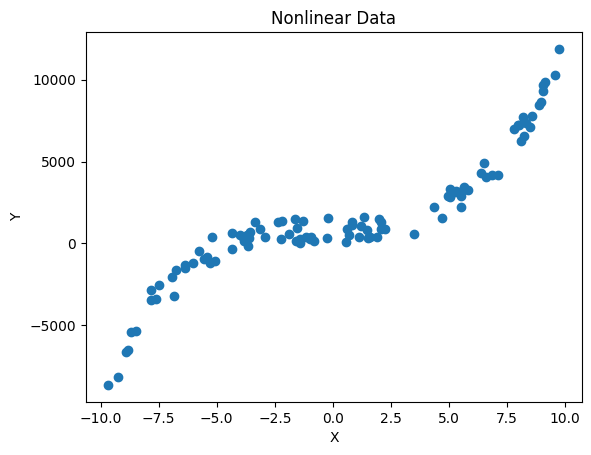

In [ ]:
data = pd.read_csv('data_nonlinear.csv')
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Nonlinear Data")
plt.show()


## 3 - Single Variable Nonlinear Regression ##


Develop a regression model, estimate coefficients with data, and derive the relationship. 

1. Establish a relationship between Y and X with a cubic function.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.000001 (1e-6)** and **10000 (1e4)** epochs.


In [ ]:
a, b, c, d = 0, 0, 0 , 0
lr = 1e-6
epochs = 10000

def predict(x):
  return a * x**3 + b * x**2 + c * x + d

def calc_mse(y, y_pred):
  return((y - y_pred) ** 2).mean()

In [ ]:
x,y = data['X'].values, data['Y'].values
for e in range(epochs):
  y_pred = predict(x)
  mean_square_error = calc_mse(y, y_pred)

  #calc gradients
  grad_a = -2 * np.sum((y-y_pred) * (x**3)) / len(x)
  grad_b = -2 * np.sum((y-y_pred) * (x**2)) / len(x)
  grad_c = -2 * np.sum((y-y_pred) * x) / len(x)
  grad_d = -2 * np.sum((y-y_pred)) / len(x)

  a -= lr * grad_a
  b -= lr * grad_b
  c -= lr * grad_c
  d -= lr * grad_d

  if e < 5 or e == epochs-1:
    print(f'Epoch {e}: a={a}, b={b}, c={c}, d={d}')

  print(f'Coefficients: a={a}, b={b}, c={c}, d={d}')


## 4 - Prediction Results ##

Derive prediction function and generate estmated results.

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

In [ ]:
y_pred = predict(x)
y_pred

array([ 1.75868605e+01, -2.52585209e+03,  7.07932686e+02,  1.55393534e+01,
        2.41848965e+03, -2.27344082e+02,  2.61989407e+01,  1.50980914e+01,
       -2.40281540e+00,  2.18902943e+03, -3.27972713e+03, -2.90099219e+02,
       -3.77900338e+03,  8.89627680e+01,  8.17888463e+01, -7.63087480e+03,
       -9.61308041e+00,  2.30641491e+02,  9.56942985e+03, -4.58659903e+02,
        2.16569299e+01, -2.75643089e+02,  6.30711667e+03, -3.82950403e+03,
       -6.66423264e+03,  2.23708043e+01,  4.41178218e+03,  1.27192030e+03,
       -2.32101908e+03,  7.06454246e+01, -2.18651866e+02, -1.55626913e+02,
        1.58029027e+03,  1.99379298e+01,  7.24324899e+03,  1.90564883e+03,
        8.28974033e+03, -2.07958632e+02,  9.83714030e+03,  6.69074572e+03,
        2.14109668e+03,  2.23135552e+01,  4.89706854e+03, -4.64599494e+02,
       -1.87894434e+03,  7.31642060e+03,  2.53078163e+03, -2.39744521e+03,
        2.07001172e+01,  1.92530207e+02, -5.42003648e+03,  2.56653055e+03,
       -5.85616821e+03,  

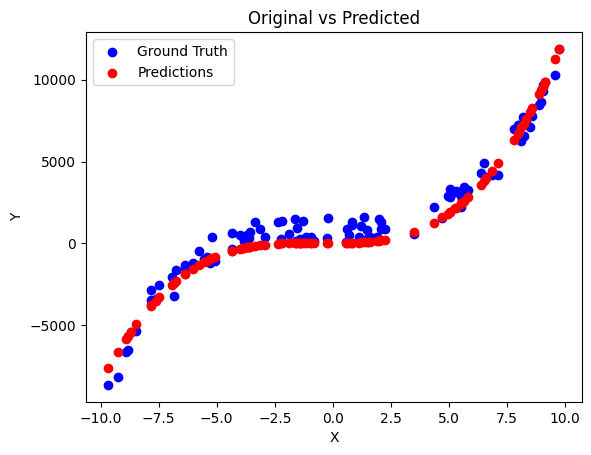

In [ ]:
plt.scatter(x, y, color = 'blue', label = 'Ground Truth')
plt.scatter(x, y_pred, color = 'red', label = 'Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Original vs Predicted")
plt.legend()
plt.show()

## 5 - Multiple Variables Linear Regression ##

## 5.1 Data Preparation

Prepare the data for regression task. 

**Tasks:**
1. Load data for multiple variable linear regression.
2. Generate the 3D scatter plot of the data.

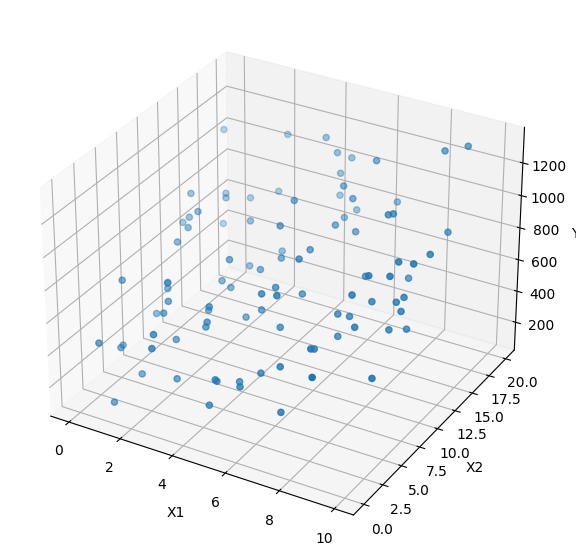

In [ ]:
data = pd.read_csv('data_two_variables.csv')
#plt.scatter(data['X1'], data['X2'], data['Y'])
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = "3d")

ax.scatter(data['X1'], data['X2'], data['Y'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()


## 5.2 Linear Regression

Develop a regression model, estimate coefficients with data, and derive the relationship.

**Tasks:**
1. Establish a linear function to describe the relationship among Y, X1, and X2.
2. Compute MSE loss with observation-prediction pairs.
3. Implement **Gradient Descent (GD)** to achieve optimal solution with the learning rate of **0.001 (1e-3)** and **10000 (1e4)** epochs.


In [19]:
lr = 0.001
epochs = 10000

m1 = 0
m2 = 0
m3 = 0

for epoch in range(epochs):
  y_pred = m1 * data['X1'] + m2 * data['X2'] + m3

  # partial derivatives
  d_m1 = (-2/len(data['X1'])) * sum(data['X1'] * (data['Y']-y_pred))
  d_m2 = (-2/len(data['X2'])) * sum(data['X2'] * (data['Y']-y_pred))
  d_m3 = (-2/len(data['Y'])) * sum((data['Y']-y_pred))

  m1 -= lr * d_m1
  m2 -= lr * d_m2
  m3 -= lr * d_m3

  print(f"Epoch {epoch}: {m1} {m2} {m3}")


Streaming output truncated to the last 5000 lines.
Epoch 5000: 35.972629588550504 36.65907040974998 182.65092614842766
Epoch 5001: 35.97139034247532 36.65831900126952 182.66633811023416
Epoch 5002: 35.97015146238165 36.65756781469948 182.68174552048845
Epoch 5003: 35.968912948161424 36.656816849974334 182.69714838053468
Epoch 5004: 35.967674799706586 36.65606610702855 182.71254669171668
Epoch 5005: 35.96643701690911 36.65531558579664 182.72794045537782
Epoch 5006: 35.96519959966101 36.65456528621313 182.7433296728611
Epoch 5007: 35.96396254785434 36.65381520821255 182.75871434550916
Epoch 5008: 35.96272586138116 36.65306535172947 182.7740944746642
Epoch 5009: 35.961489540133584 36.65231571669846 182.789470061668
Epoch 5010: 35.96025358400376 36.65156630305413 182.804841107862
Epoch 5011: 35.95901799288385 36.6508171107311 182.8202076145872
Epoch 5012: 35.95778276666606 36.65006813966399 182.83556958318422
Epoch 5013: 35.956547905242616 36.64931938978748 182.85092701499335
Epoch 5014: 3


## 5.3 - Prediction Results ##

Derive prediction function and generate estmated results. 

**Tasks:**
1. Derive prediction function with the obtained coefficients above.
2. Generate 3D scatter plots for original data pairs X-Y and prediction results X-Y_Pred in the same figure.

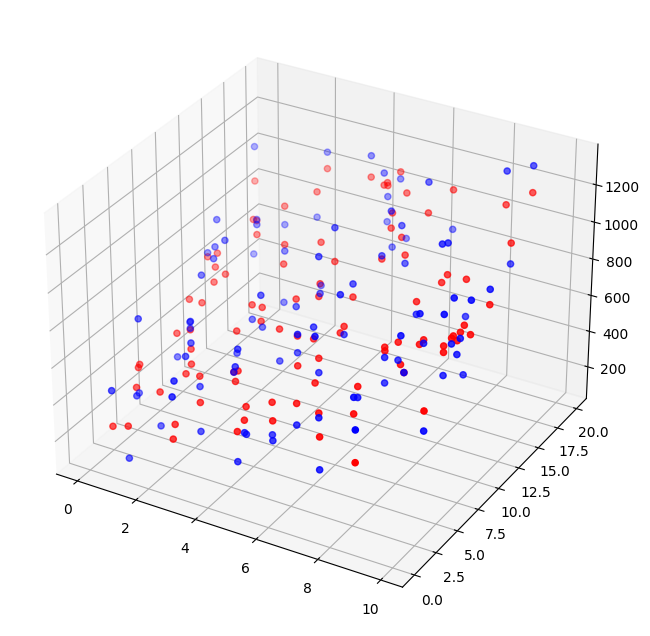

In [22]:
y_pred = m1 * data['X1'] + m2 * data['X2'] + m3

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['X1'], data['X2'], data['Y'], color='blue', label = 'Ground Truth')
ax.scatter(data['X1'], data['X2'], y_pred, color='red', label='Predicted')